In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 7.4 MB/s 
     |████████████████████████████████| 46 kB 5.6 MB/s 
     |████████████████████████████████| 1.2 MB 60.5 MB/s 
     |████████████████████████████████| 188 kB 71.4 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 51 kB 414 kB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *

In [ ]:
from fastai.vision.all import *
path = Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep')

In [ ]:
train_fnames = get_image_files(path/"Binary")

In [ ]:
train_fnames

(#500) [Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/1-s2.0-S1684118220300608-main.pdf-001.jpg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/covid-19-pneumonia-evolution-over-a-week-1-day0-PA.jpg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/covid-19-pneumonia-12.jpg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/7EF28E12-F628-4BEC-A8C5-E6277C2E4F60.png'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/9fdd3c3032296fd04d2cad5d9070d4_jumbo.jpeg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-admission.jpg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/figure1-5e73d7ae897e27ff066a30cb-98.jpeg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto

In [ ]:
augs = [RandomResizedCropGPU(size=224, min_scale=0.75), Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=23),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

dls = dblock.dataloaders(train_fnames)


In [ ]:
train_df = len(train_fnames)
print(f"There are {train_df} images")

There are 500 images


In [ ]:
# print class names, number of class, length of train dataset, and length of valid dataset
dls.c, len(dls.train_ds), len(dls.valid_ds)

(2, 400, 100)

In [ ]:
dls.vocab


['Covid-19', 'No_findings']

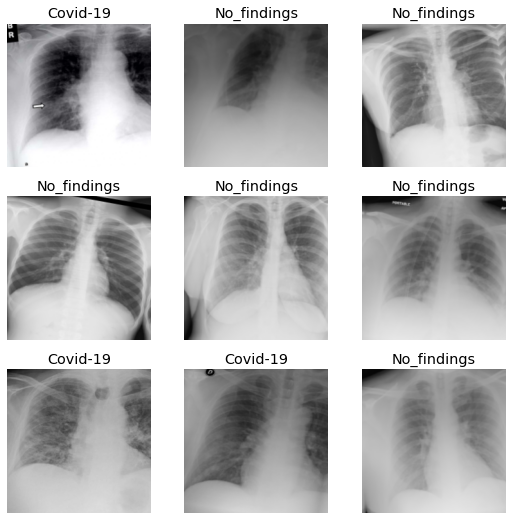

In [ ]:
dls.show_batch()

In [ ]:
model = nn.Sequential(create_body(xresnet50, pretrained=False),create_head(nf=2048, n_out=2))
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

In [ ]:
#learn = cnn_learner(dls, resnet34, metrics=accuracy)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


SuggestedLRs(valley=9.120108734350652e-05)

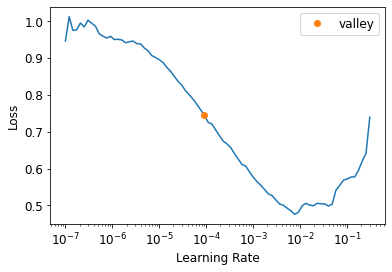

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(100,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.506434,0.973993,0.220000,00:56
1,0.357440,1.164783,0.230000,00:16
2,0.292497,1.548657,0.250000,00:16
3,0.263154,2.024441,0.290000,00:16
4,0.229873,3.408236,0.230000,00:17
5,0.202870,1.168395,0.600000,00:16
6,0.201539,0.898701,0.640000,00:16
7,0.196356,0.503315,0.860000,00:15
8,0.179684,0.239152,0.930000,00:16
9,0.176819,3.428643,0.470000,00:16


In [ ]:
learn.fine_tune(100)

epoch,train_loss,valid_loss,accuracy,time
0,0.026166,0.290116,0.950000,00:17


epoch,train_loss,valid_loss,accuracy,time
0,0.026840,0.281411,0.950000,00:17
1,0.021935,0.238885,0.950000,00:16
2,0.014875,0.258474,0.950000,00:16
3,0.014466,0.269511,0.950000,00:16
4,0.015041,0.311024,0.950000,00:16
5,0.017920,0.318253,0.950000,00:17
6,0.014796,0.301588,0.950000,00:16
7,0.013636,0.286363,0.950000,00:16
8,0.017926,0.325477,0.950000,00:17
9,0.019606,0.316251,0.950000,00:17


In [ ]:
learn.save(path/'Covid_xresnet50_08152021')

Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Covid_xresnet50_08152021.pth')

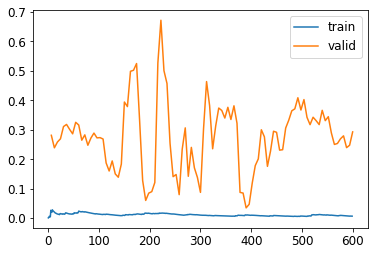

In [ ]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [ ]:
test_items = get_image_files(path/"Binary_Test")
all_files = get_image_files(path)

In [ ]:
test_items

(#159) [Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary_Test/Covid-19/011.jpeg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary_Test/Covid-19/006.jpeg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary_Test/Covid-19/016.jpeg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary_Test/Covid-19/017.jpeg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary_Test/Covid-19/023.jpeg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary_Test/Covid-19/013.jpeg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary_Test/Covid-19/008.jpg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary_Test/Covid-19/022.jpg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary_Test/Covid-19/007.jpg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary_Test/Covid-19/020.jpg')...]

In [ ]:
all_files

(#1508) [Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/1-s2.0-S1684118220300608-main.pdf-001.jpg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/covid-19-pneumonia-evolution-over-a-week-1-day0-PA.jpg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/covid-19-pneumonia-12.jpg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/7EF28E12-F628-4BEC-A8C5-E6277C2E4F60.png'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/9fdd3c3032296fd04d2cad5d9070d4_jumbo.jpeg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-admission.jpg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/figure1-5e73d7ae897e27ff066a30cb-98.jpeg'),Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/Covid-19/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg'),Path('/content/gdrive/MyDrive/UTEC-Proyect

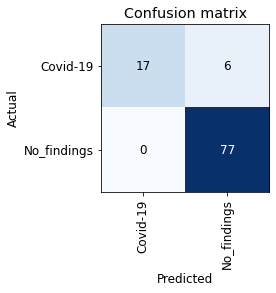

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


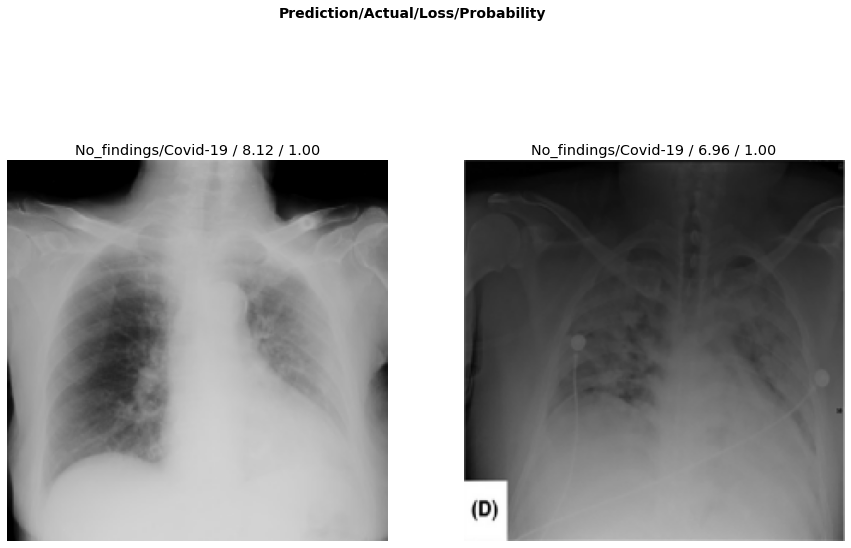

In [ ]:
interp.plot_top_losses(2, figsize=(15,10))

In [ ]:
interp.most_confused()

[('Covid-19', 'No_findings', 6)]

In [ ]:
losses,idxs = interp.top_losses(10)
print(idxs)

TensorBase([80, 31, 42, 22, 57, 43, 68, 71, 94, 61])


In [ ]:
dls.valid_ds.items[77]

Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary/No_findings/00001526_002.png')

In [ ]:
interp.print_classification_report()

TEST set

In [ ]:
augs = [RandomResizedCropGPU(size=224, min_scale=0.75), Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=GrandparentSplitter(train_name='Binary', valid_name='Binary_Test'),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

dls_test = dblock.dataloaders(all_files)

In [ ]:
print("Number of examples in testing:", len(dls_test.valid_ds))

Number of examples in testing: 159


In [ ]:
learn1 = learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy).load('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Covid_xresnet50_08152021')

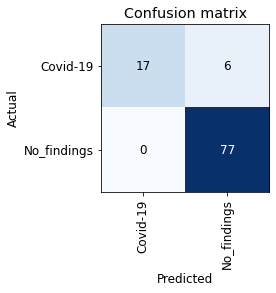

In [ ]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()


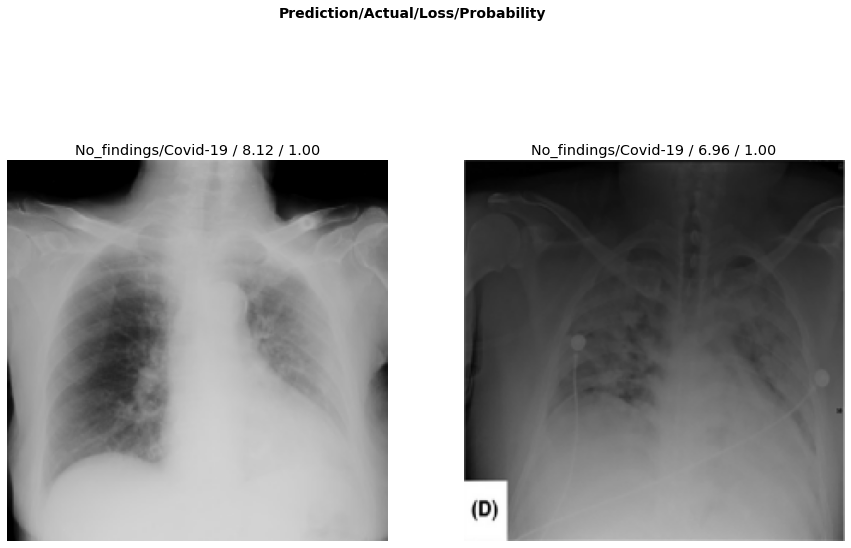

In [ ]:
interp.plot_top_losses(2, figsize=(15,10))

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

    Covid-19       1.00      0.74      0.85        23
 No_findings       0.93      1.00      0.96        77

    accuracy                           0.94       100
   macro avg       0.96      0.87      0.91       100
weighted avg       0.94      0.94      0.94       100



In [ ]:
interp.most_confused()

[('Covid-19', 'No_findings', 6)]

In [ ]:
losses,idxs = interp.top_losses(2)
print(idxs)

TensorBase([80, 31])


In [ ]:
dls_test.valid_ds.items[20]

Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Binary_Test/Covid-19/009.jpg')

In [ ]:
img = PILImage.create(uploader.data[0])
covid_19,_,probs = learn.predict(img)
print(f"Is this a Kidney Stone?: {covid_19}")
print(f"Probability it's a Kidney stone: {probs[0].item():.2f}")

NameError: ignored

In [ ]:
class HookActivation():
    def __init__(self, target_layer):
        """Initialize a Pytorch hook using `hook_activation` function."""

        self.hook = target_layer.register_forward_hook(self.hook_activation) 
        
    def hook_activation(self, target_layer, activ_in, activ_out): 
        """Create a copy of the layer output activations and save 
        in `self.stored`.
        """
        self.stored = activ_out.detach().clone()
        
    def __enter__(self, *args): 
        return self
    
    def __exit__(self, *args): 
        self.hook.remove()

        
class HookGradient():
    def __init__(self, target_layer):
        """Initialize a Pytorch hook using `hook_gradient` function."""
        
        self.hook = target_layer.register_backward_hook(self.hook_gradient)   
        
    def hook_gradient(self, target_layer, gradient_in, gradient_out): 
        """Create a copy of the layer output gradients and save 
        in `self.stored`.
        """
        self.stored = gradient_out[0].detach().clone()
        
    def __enter__(self, *args): 
        return self

    def __exit__(self, *args): 
        self.hook.remove()

In [ ]:
path

Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep')

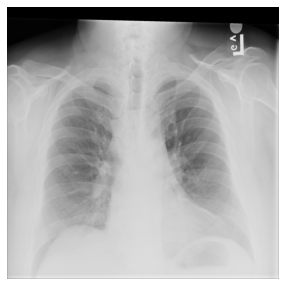

In [ ]:
img = PILImage.create(path/'Binary_Test'/'No_findings'/'00001323_001.png')
img1 = PILImage.create(path/'Binary_Test'/'Covid-19'/'001.jpeg')
img2 = PILImage.create(path/'Binary_Test'/'Covid-19'/'002.jpeg')
img3 = PILImage.create(path/'Binary_Test'/'Covid-19'/'003.jpeg')
img.show()



In [ ]:
learn1.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 32 x 112 x 112 
Conv2d                                    864        True      
BatchNorm2d                               64         True      
ReLU                                                           
Conv2d                                    9216       True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 112 x 112 
Conv2d                                    18432      True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               

In [ ]:
m = learn1.model.eval();
m;

In [ ]:
learn1.save(path/'Covid_xresnet50_test_08152021')

Path('/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Covid_xresnet50_test_08152021.pth')

In [ ]:
A = open(r'/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Covid_xresnet50_test_08152021.pth')
A

<_io.TextIOWrapper name='/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Covid_xresnet50_test_08152021.pth' mode='r' encoding='UTF-8'>

In [ ]:
print(A)

<_io.TextIOWrapper name='/content/gdrive/MyDrive/UTEC-Proyecto/Deep/Deep/Covid_xresnet50_test_08152021.pth' mode='r' encoding='UTF-8'>


In [ ]:
target_layer = learn1.model[0][7][2]

target_layer;

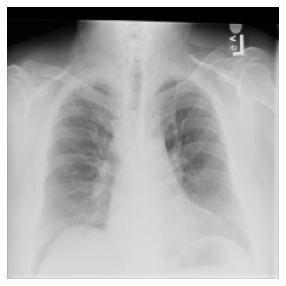

In [ ]:
x, = first(dls_test.test_dl([img]))

x_img = TensorImage(dls_test.train.decode((x,))[0][0])
x_img.show()


In [ ]:
learn1.predict(img)

('No_findings', tensor(1), tensor([1.9104e-09, 1.0000e+00]))

In [ ]:
dls_test.vocab

['Covid-19', 'No_findings']

In [ ]:
class_Z = 1

with HookGradient(target_layer) as hookg:
    with HookActivation(target_layer) as hook:
        output = learn1.model.eval()(x.cuda())
        act = hook.stored
    output[0, class_Z].backward()
    grad = hookg.stored
    p0, p1 = output.cpu().detach()[0]

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [ ]:
w = grad[0].mean(dim=(1,2), keepdim=True)
gradcam_map = (w * act[0]).sum(0).detach().cpu()

In [ ]:
def plot_gradcam(img, learn1, hooked_layer, size=224):
    
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(8.5, 3), dpi=150)

    x_img = TensorImage(dls_test.train.decode((x,))[0][0])
    
    
    for i, ax in zip([0, 2, 1], axes):

        if i == 0:
            x_img.show(ax=ax)
            ax.set_axis_off()
            continue

        with HookGradient(hooked_layer) as hookg:
            with HookActivation(hooked_layer) as hook:
                output = learn1.model.eval()(x.cuda())
                act = hook.stored
            output[0, i-1].backward()
            grad = hookg.stored
            p_high, p_low = output.cpu().detach()[0]

        w = grad[0].mean(dim=(1,2), keepdim=True)
        gradcam_map = (w * act[0]).sum(0).detach().cpu()

        # thresholding to account for ReLU
        gradcam_map = torch.clamp(gradcam_map, min=0) 

        x_img.show(ax=ax)
        ax.imshow(
            gradcam_map, alpha=0.6, extent=(0, size, size,0),
            interpolation='mitchell', cmap='hot'
        )
        ax.set_axis_off()
            
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.02)
    
    return (fig, axes, *(np.exp([p_low, p_high]) / np.exp([p_low, p_high]).sum()))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


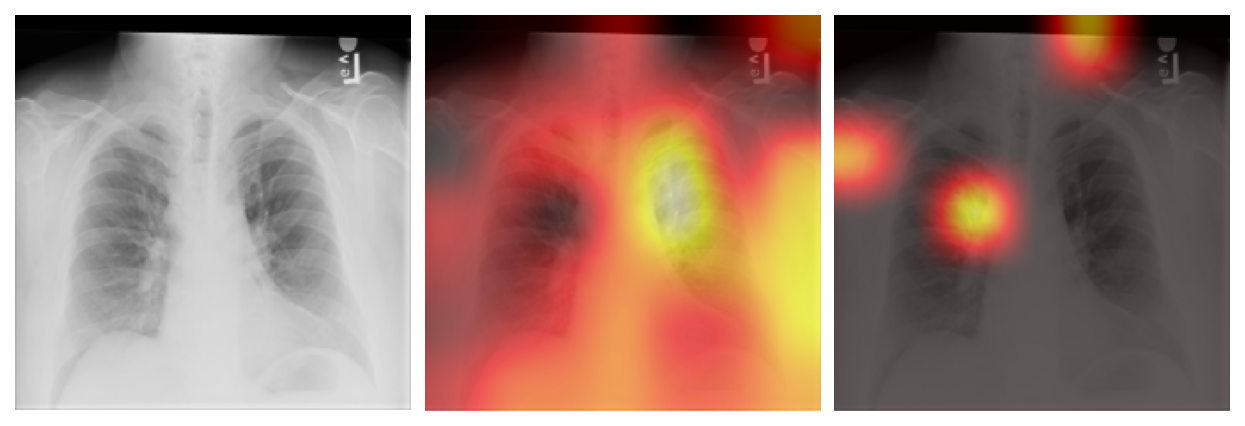

In [ ]:
plot_gradcam(x_img,learn1,target_layer);

In [ ]:
img = PILImage.create(path/'Binary_Test'/'Covid-19'/'005.jpeg')

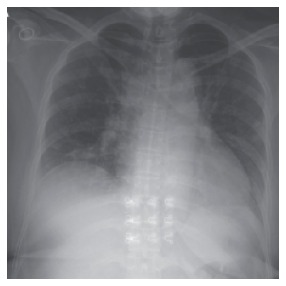

In [ ]:
x, = first(dls_test.test_dl([img]))

x_img = TensorImage(dls_test.train.decode((x,))[0][0])
x_img.show()

In [ ]:
class_Z = 0

with HookGradient(target_layer) as hookg:
    with HookActivation(target_layer) as hook:
        output = learn1.model.eval()(x.cuda())
        act = hook.stored
    output[0, class_Z].backward()
    grad = hookg.stored
    p0, p1 = output.cpu().detach()[0]

w = grad[0].mean(dim=(1,2), keepdim=True)
gradcam_map = (w * act[0]).sum(0).detach().cpu()
def plot_gradcam(img, learn1, hooked_layer, size=224):
    
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(8.5, 3), dpi=150)

    x_img = TensorImage(dls_test.train.decode((x,))[0][0])
    
    
    for i, ax in zip([0, 2, 1], axes):

        if i == 0:
            x_img.show(ax=ax)
            ax.set_axis_off()
            continue

        with HookGradient(hooked_layer) as hookg:
            with HookActivation(hooked_layer) as hook:
                output = learn1.model.eval()(x.cuda())
                act = hook.stored
            output[0, i-1].backward()
            grad = hookg.stored
            p_high, p_low = output.cpu().detach()[0]

        w = grad[0].mean(dim=(1,2), keepdim=True)
        gradcam_map = (w * act[0]).sum(0).detach().cpu()

        # thresholding to account for ReLU
        gradcam_map = torch.clamp(gradcam_map, min=0) 

        x_img.show(ax=ax)
        ax.imshow(
            gradcam_map, alpha=0.6, extent=(0, size, size,0),
            interpolation='mitchell', cmap='hot'
        )
        ax.set_axis_off()
            
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.02)
    
    return (fig, axes, *(np.exp([p_low, p_high]) / np.exp([p_low, p_high]).sum()))



/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


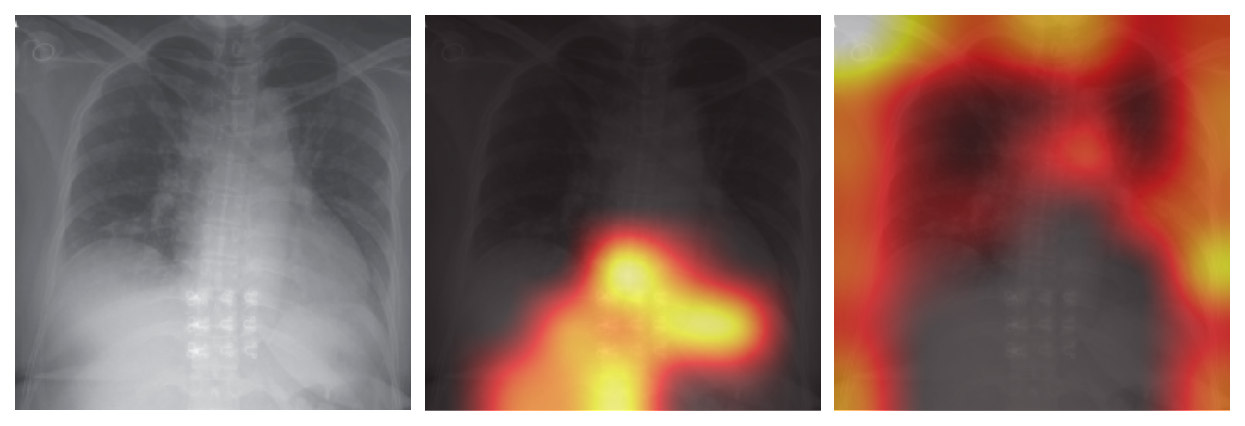

In [ ]:
plot_gradcam(x_img,learn1,target_layer);

In [ ]:
img = PILImage.create(path/'Binary_Test'/'Covid-19'/'006.jpeg')

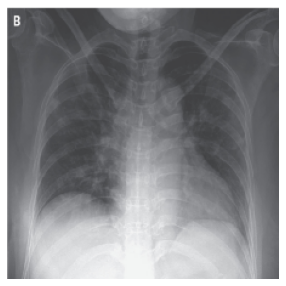

In [ ]:
x, = first(dls_test.test_dl([img]))

x_img = TensorImage(dls_test.train.decode((x,))[0][0])
x_img.show()

In [ ]:
class_Z = 0

with HookGradient(target_layer) as hookg:
    with HookActivation(target_layer) as hook:
        output = learn1.model.eval()(x.cuda())
        act = hook.stored
    output[0, class_Z].backward()
    grad = hookg.stored
    p0, p1 = output.cpu().detach()[0]

w = grad[0].mean(dim=(1,2), keepdim=True)
gradcam_map = (w * act[0]).sum(0).detach().cpu()
def plot_gradcam(img, learn1, hooked_layer, size=224):
    
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(8.5, 3), dpi=150)

    x_img = TensorImage(dls_test.train.decode((x,))[0][0])
    
    
    for i, ax in zip([0, 2, 1], axes):

        if i == 0:
            x_img.show(ax=ax)
            ax.set_axis_off()
            continue

        with HookGradient(hooked_layer) as hookg:
            with HookActivation(hooked_layer) as hook:
                output = learn1.model.eval()(x.cuda())
                act = hook.stored
            output[0, i-1].backward()
            grad = hookg.stored
            p_high, p_low = output.cpu().detach()[0]

        w = grad[0].mean(dim=(1,2), keepdim=True)
        gradcam_map = (w * act[0]).sum(0).detach().cpu()

        # thresholding to account for ReLU
        gradcam_map = torch.clamp(gradcam_map, min=0) 

        x_img.show(ax=ax)
        ax.imshow(
            gradcam_map, alpha=0.6, extent=(0, size, size,0),
            interpolation='mitchell', cmap='hot'
        )
        ax.set_axis_off()
            
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.02)
    
    return (fig, axes, *(np.exp([p_low, p_high]) / np.exp([p_low, p_high]).sum()))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


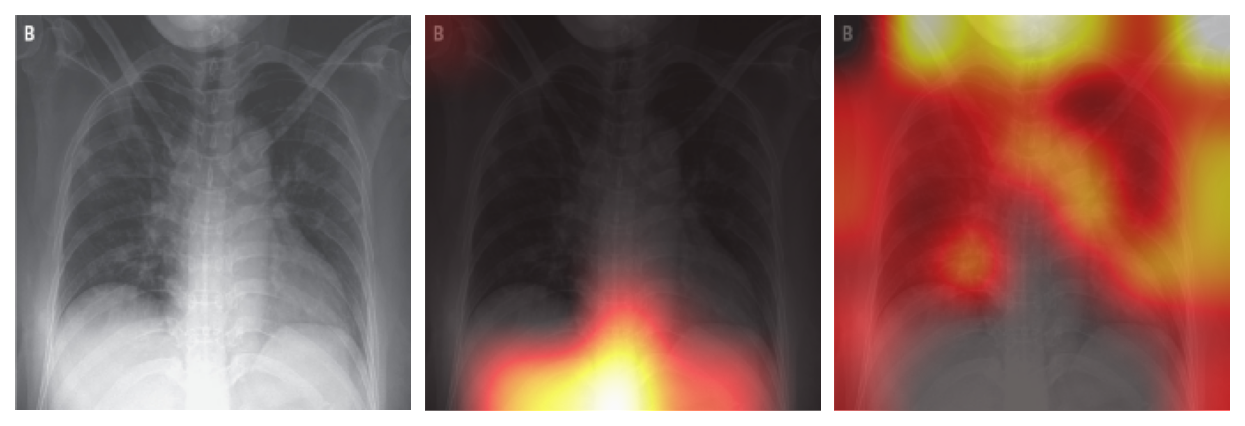

In [ ]:
plot_gradcam(x_img,learn1,target_layer);

In [ ]:
img = PILImage.create(path/'Binary_Test'/'Covid-19'/'007.jpg')

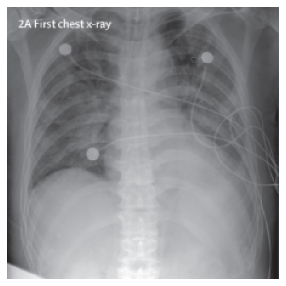

In [ ]:
x, = first(dls_test.test_dl([img]))

x_img = TensorImage(dls_test.train.decode((x,))[0][0])
x_img.show()

In [ ]:
class_Z = 0

with HookGradient(target_layer) as hookg:
    with HookActivation(target_layer) as hook:
        output = learn1.model.eval()(x.cuda())
        act = hook.stored
    output[0, class_Z].backward()
    grad = hookg.stored
    p0, p1 = output.cpu().detach()[0]

w = grad[0].mean(dim=(1,2), keepdim=True)
gradcam_map = (w * act[0]).sum(0).detach().cpu()
def plot_gradcam(img, learn1, hooked_layer, size=224):
    
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(8.5, 3), dpi=150)

    x_img = TensorImage(dls_test.train.decode((x,))[0][0])
    
    
    for i, ax in zip([0, 2, 1], axes):

        if i == 0:
            x_img.show(ax=ax)
            ax.set_axis_off()
            continue

        with HookGradient(hooked_layer) as hookg:
            with HookActivation(hooked_layer) as hook:
                output = learn1.model.eval()(x.cuda())
                act = hook.stored
            output[0, i-1].backward()
            grad = hookg.stored
            p_high, p_low = output.cpu().detach()[0]

        w = grad[0].mean(dim=(1,2), keepdim=True)
        gradcam_map = (w * act[0]).sum(0).detach().cpu()

        # thresholding to account for ReLU
        gradcam_map = torch.clamp(gradcam_map, min=0) 

        x_img.show(ax=ax)
        ax.imshow(
            gradcam_map, alpha=0.6, extent=(0, size, size,0),
            interpolation='mitchell', cmap='hot'
        )
        ax.set_axis_off()
            
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.02)
    
    return (fig, axes, *(np.exp([p_low, p_high]) / np.exp([p_low, p_high]).sum()))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


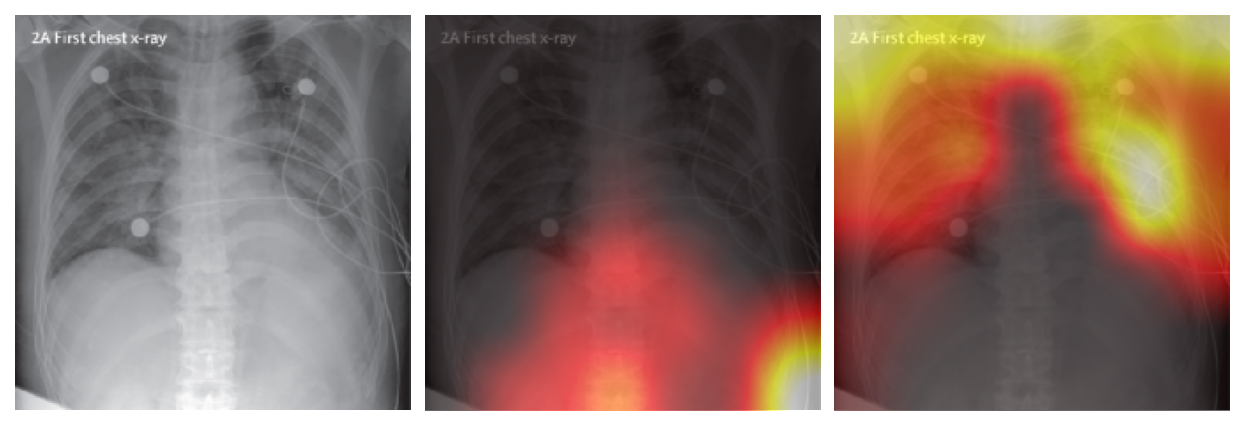

In [ ]:
plot_gradcam(x_img,learn1,target_layer);